In [3]:
import anndata, pickle, os, fnmatch, math, random
import scipy.stats as stats
import statistics as st
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib as mlp
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
from matplotlib.colors import ListedColormap
from matplotlib.ticker import MultipleLocator, LogLocator, LogFormatter, LogFormatterSciNotation, MaxNLocator
import matplotlib.patches as mpatches

In [24]:
'''IMPORTING FUNCTIONS FROM GENERAL FUNCTIONS FILE'''

%run GeneralFunctions.ipynb

In [53]:
yuh = sc.read("F:/SampleData/PlasticityComparisons_noSexGenes/VC MD vs. Control_1_VC20L_9_VC23L.h5ad")

In [52]:
# Genes to remove
genesToRemove = ['Eif2s3y', 'Eif2s3x', 'Zfy', 'Usp9y', 'Ddx3y', 'Ddx3x', 'Uty', 'Ubely', 'Tspy', 'Kdm5d', 'Kdm5c', 'Rbmy',
                   'Sry', 'Utx', 'Kdm6a', 'Xist', 'Tsix']
saveFolder = 'PlasticityComparisons_noSexGenes'
removeGenes(yuh1, genesToRemove, 'VC MD vs. Control', '1_VC20L', '9_VC23L', saveFolder)

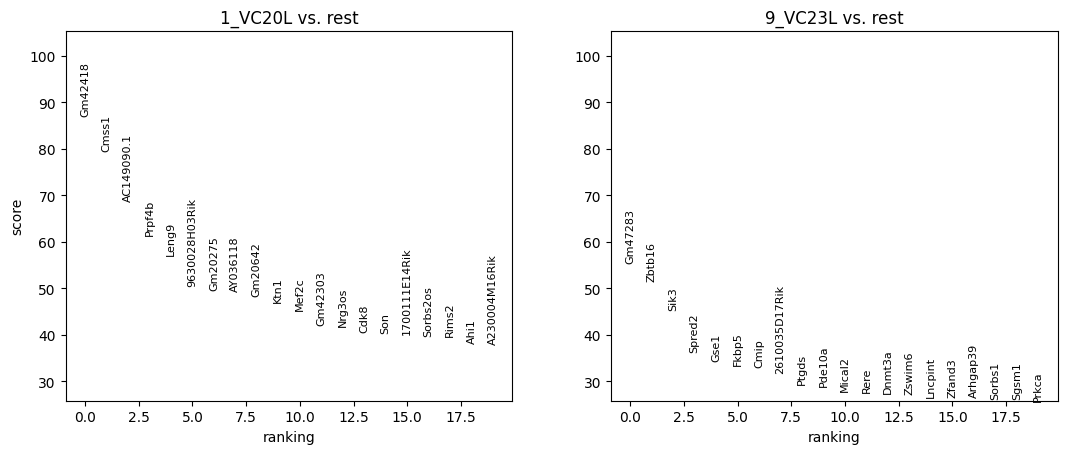

In [58]:
yuh.uns['log1p'] = {'base': None}
sc.tl.rank_genes_groups(yuh, groupby='sample', method='wilcoxon', use_raw=False)
sc.pl.rank_genes_groups(yuh, groupby='sample')

In [11]:
yuh1 = sc.read("F:/SampleData/PlasticityComparisons/VC MD vs. Control_1_VC20L_9_VC23L.h5ad")

C:\Users\Hlab\AppData\Local\Programs\Python\Python310\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\Users\Hlab\AppData\Local\Programs\Python\Python310\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\Users\Hlab\AppData\Local\Programs\Python\Python310\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\Users\Hlab\AppData\Local\Programs\Python\Python310\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


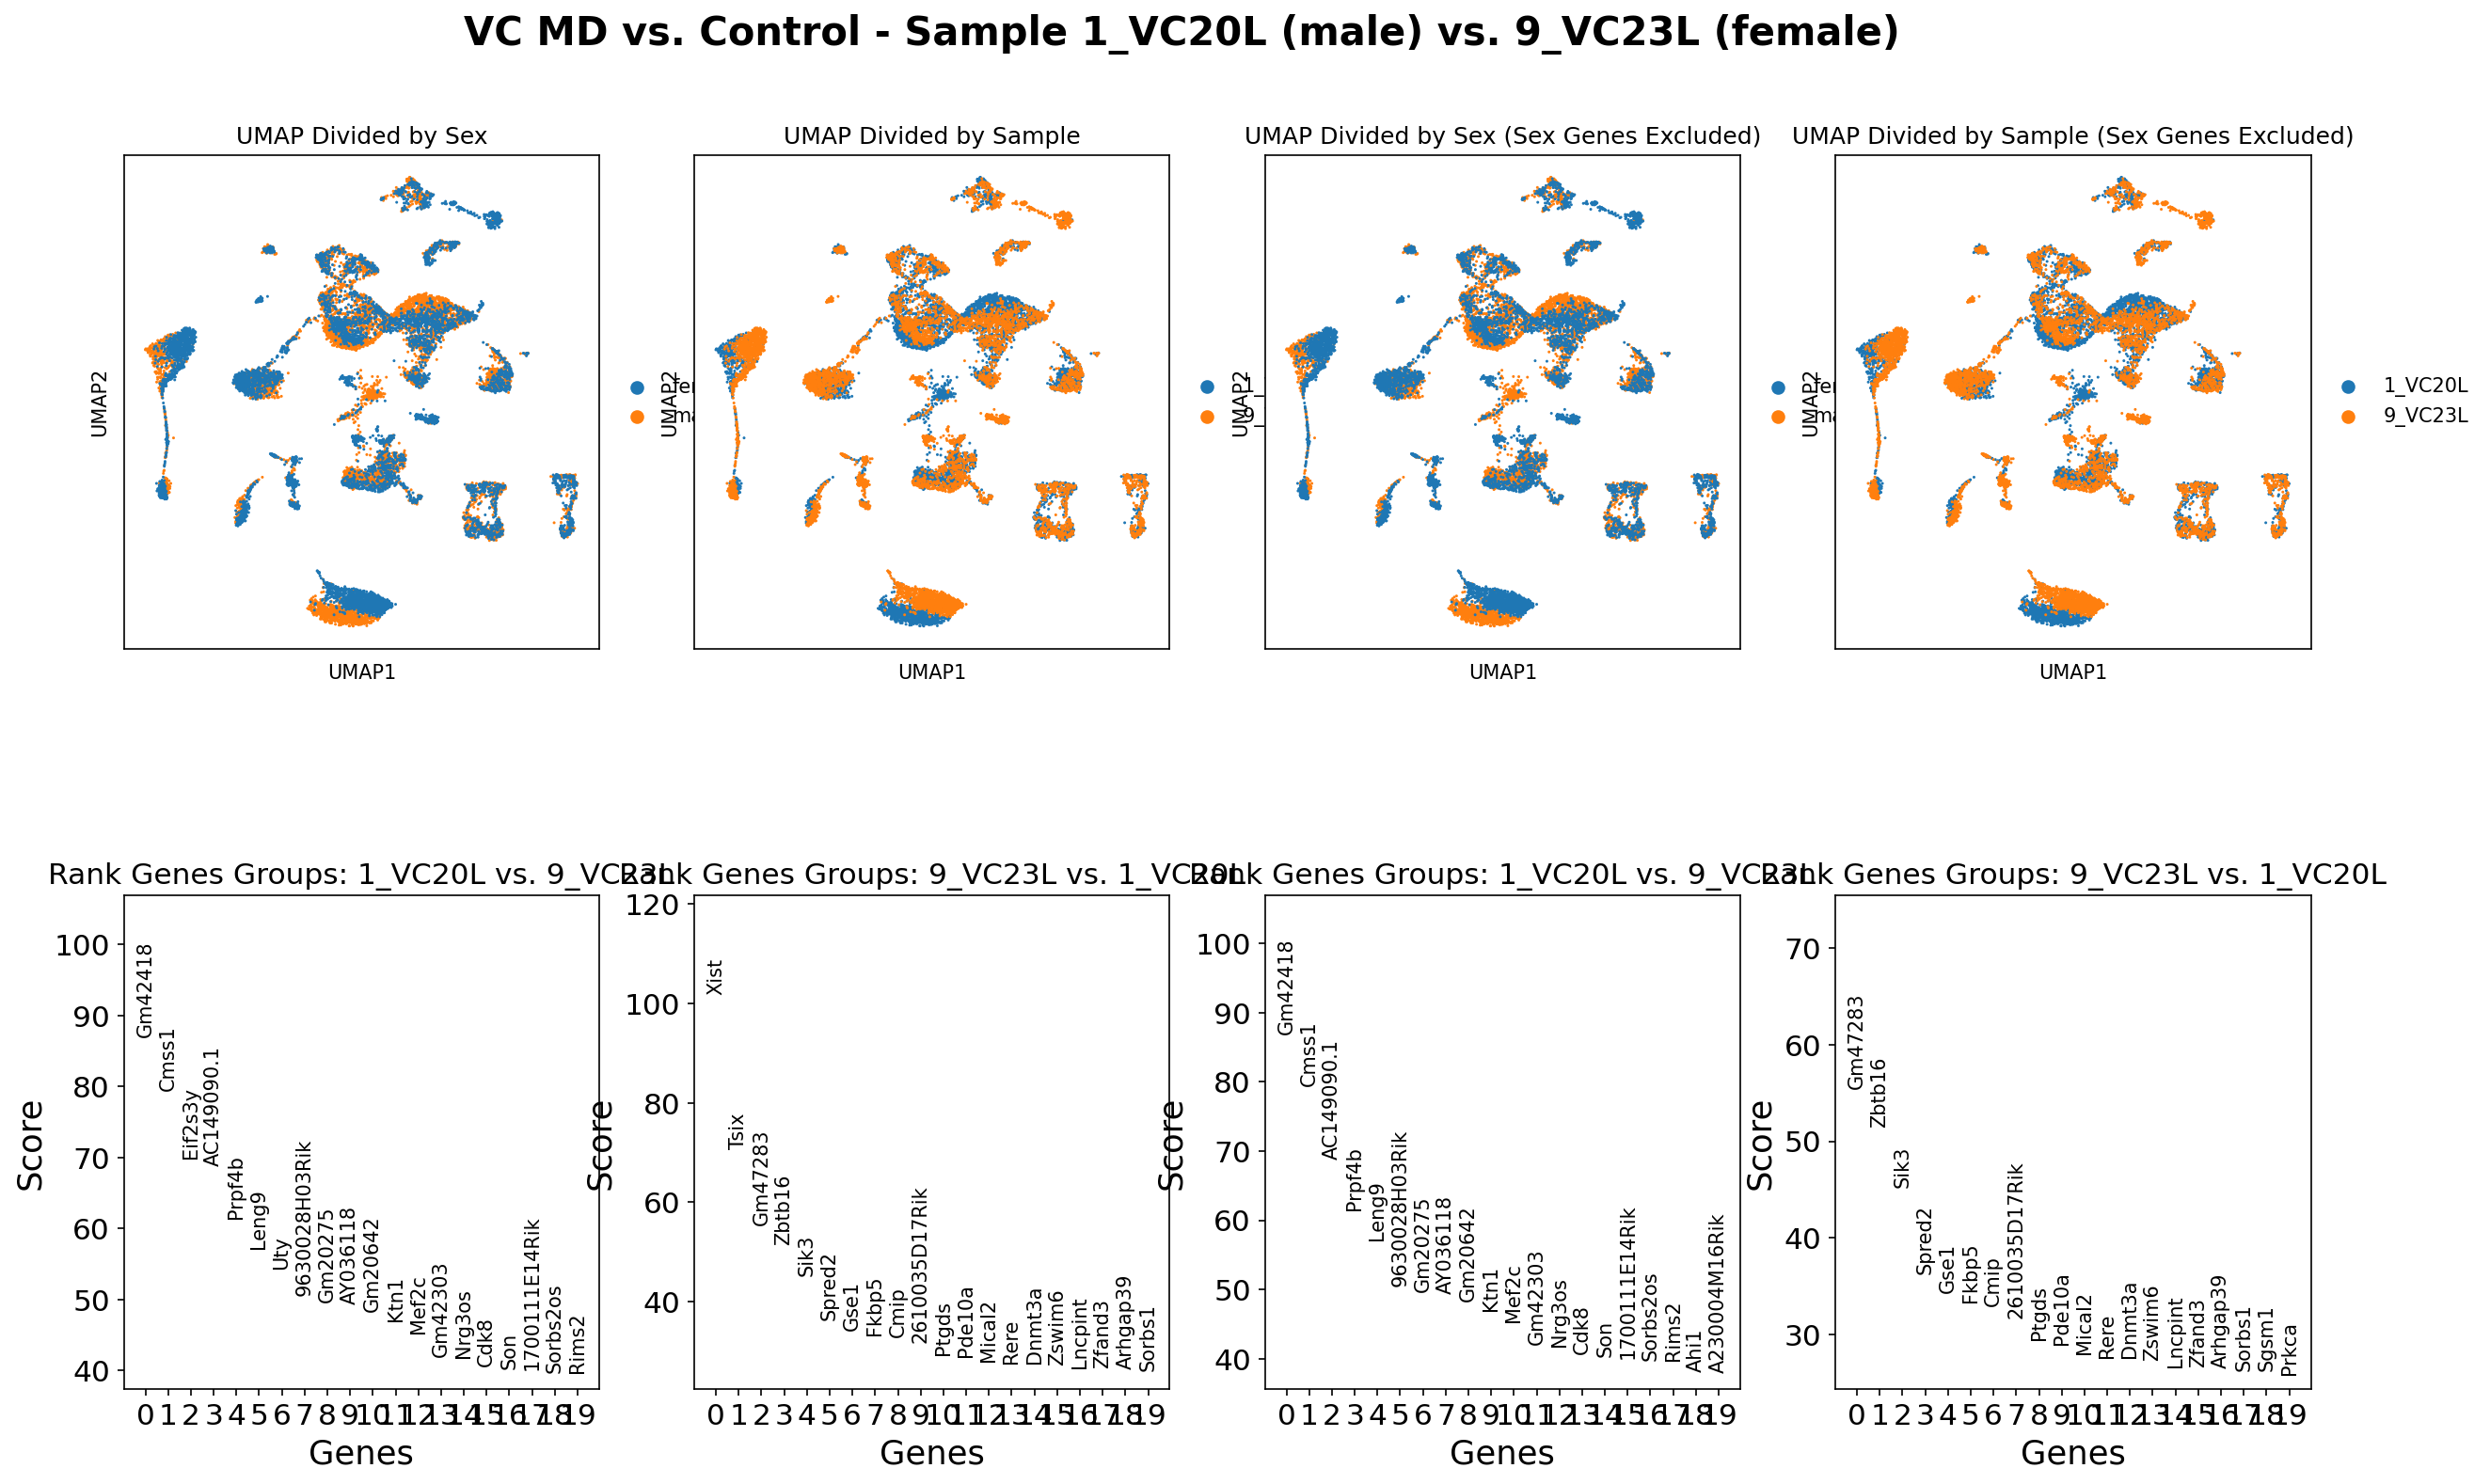

In [66]:
savePath = 'F:/Figures/Figure8/PlasticityComparisons' 
figure8(yuh1, yuh, ['VC MD vs. Control', '1_VC20L', '9_VC23L'], False, savePath)

# Calculation Functions Figure 8

In [50]:
def removeGenes(sampleObj, genesToRemove, condition, sample1_name, sample2_name, saveFolder):

    sampleObj = sampleObj[:, ~sampleObj.var_names.isin(genesToRemove)]
    
#     remove = sampleObj.var_names.str.startswith(genesToRemove)
    
#     keep = np.invert(remove)

#     sampleObj = sampleObj[:,keep]
    
    # Re-Clustering Half1_A
    # PCA
    sc.tl.pca(sampleObj, svd_solver='arpack')

    # Neighbors and UMAP Computations
    sc.pp.neighbors(sampleObj, n_neighbors=50, n_pcs =50, use_rep = "Scanorama")
    sc.tl.umap(sampleObj) 

    # Re-calculating cluster numbers 
    sc.tl.leiden(sampleObj, resolution = 0.3, key_added = "leiden_0.3")

    # Calculates nuclei and gene information specific to the sample object 
    sc.pp.calculate_qc_metrics(sampleObj, percent_top=None, log1p=False, inplace=True)
    
    # Step 4: Assign the filtered AnnData object
    sampleObj.write(f'F:/SampleData/{saveFolder}/{condition}_{sample1_name}_{sample2_name}.h5ad')

# Plotting Functions Figure 8

In [65]:
def figure8(obj_sexGenes, obj_noSexGenes, comparLst, diffSex, savePath):
    # Sample Info
    condition = comparLst[0]
    sample1_name = comparLst[1]
    sample2_name = comparLst[2]
    sample1_mouseSex = mouseSex(sample1_name)
    sample2_mouseSex = mouseSex(sample2_name)
    
    # Create a figure with subplots
    fig = plt.figure(figsize=(20,25), dpi=150)

    row = 4 
    col = 8

    ax1 = plt.subplot2grid((row, col), (0, 0), colspan=2) # Sample Umap Divided by Sex W GENES
    ax2 = plt.subplot2grid((row, col), (0, 2), colspan=2) # Sample Umap Divided by Sample W GENES
    
    ax3 = plt.subplot2grid((row, col), (0, 4), colspan=2) # Sample Umap Divided by Sex NO GENES
    ax4 = plt.subplot2grid((row, col), (0, 6), colspan=2) # Sample Umap Divided by Sample NO GENES
    
    ax5 = plt.subplot2grid((row, col), (1, 0), colspan=2) # DE Sample1 W GENES
    ax6 = plt.subplot2grid((row, col), (1, 2), colspan=2) # DE Sample2 W GENES

    ax7 = plt.subplot2grid((row, col), (1, 4), colspan=2) # DE Sample1 NO GENES
    ax8 = plt.subplot2grid((row, col), (1, 6), colspan=2) # DE Sample2 NO GENES
    
    if diffSex == False:
#         ax9 = plt.subplot2grid((row, col), (2, 0), colspan=2) # DE Female W GENES 
#         ax10 = plt.subplot2grid((row, col), (2, 2), colspan=2) # DE Male W GENES
        
#         ax11 = plt.subplot2grid((row, col), (2, 4), colspan=2) # DE Female NO GENES 
#         ax12 = plt.subplot2grid((row, col), (2, 6), colspan=2) # DE Male  NO GENES
 
        sc.pl.umap(obj_sexGenes, color='sex', ax=ax1, show=False)
#         labeledClusteredUmap(obj_sexGenes, 'sex', 'sex', 15, ax1)
        ax1.set_title('UMAP Divided by Sex')
        
        sc.pl.umap(obj_noSexGenes, color='sex', ax=ax3, show=False)
#         labeledClusteredUmap(obj_noSexGenes, 'sex', 'on margin', 15, ax3)
        ax3.set_title('UMAP Divided by Sex (Sex Genes Excluded)')
        
#         obj_sexGenes.uns['log1p'] = {'base': None}
#         sc.tl.rank_genes_groups(obj_sexGenes, groupby='sex', method='wilcoxon')
#         deGraph(obj_sexGenes, 'male', 'female', 15, ax9)
#         deGraph(obj_sexGenes, 'female', 'male', 15, ax10)

#         obj_noSexGenes.uns['log1p'] = {'base': None}
#         sc.tl.rank_genes_groups(obj_noSexGenes, groupby='sex', method='wilcoxon')
#         deGraph(obj_noSexGenes, 'male', 'female', 15, ax11)
#         deGraph(obj_noSexGenes, 'female', 'male', 15, ax12)
    
    else: 
        sc.pl.umap(obj_sexGenes, color='leiden_0.3', legend_loc='on data', show=False, ax=ax1)
        ax1.set_title('UMAP Divided by Sample')
        
        sc.pl.umap(obj_noSexGenes, color='leiden_0.3', legend_loc='on data', show=False, ax=ax3)
        ax3.set_title('UMAP Divided by Sample (Sex Genes Excluded)')
    
    sc.pl.umap(obj_sexGenes, color='sample', ax=ax2, show=False)
#     labeledClusteredUmap(obj_sexGenes, 'sample', 'on margin', 15, ax2)
    ax2.set_title('UMAP Divided by Sample')   

    sc.pl.umap(obj_noSexGenes, color='sample', ax=ax4, show=False)
#     labeledClusteredUmap(obj_noSexGenes, 'sample', 'on margin', 15, ax4)
    ax4.set_title('UMAP Divided by Sample (Sex Genes Excluded)')
    
    obj_sexGenes.uns['log1p'] = {'base': None}
    sc.tl.rank_genes_groups(obj_sexGenes, groupby='sample', method='wilcoxon', use_raw=False)
    deGraph(obj_sexGenes, sample1_name, sample2_name, 15, ax5)
    deGraph(obj_sexGenes, sample2_name, sample1_name, 15, ax6)

#     obj_noSexGenes.uns['log1p'] = {'base': None}
#     sc.tl.rank_genes_groups(obj_noSexGenes, groupby='sample', method='wilcoxon')
    deGraph(obj_noSexGenes, sample1_name, sample2_name, 15, ax7)
    deGraph(obj_noSexGenes, sample2_name, sample1_name, 15, ax8)
    
    fig.suptitle(f'{condition} - Sample {sample1_name} ({sample1_mouseSex}) vs. {sample2_name} ({sample2_mouseSex})', 
                 fontsize=20, fontweight='bold', y=0.92)
    
    # Adjust the spacing between subplots
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    
    # Saving the figure onto the computer 
    plt.savefig(os.path.join(savePath, f'{condition}_{sample1_name}_{sample2_name}.jpg'), bbox_inches = 'tight')
    

In [ ]:
def plottingFigure8(sampleComparLst, sampleFolder_sexGenes, sampleFolder_noSexGenes, savePath):
    for lst in sampleComparLst:
        condition = lst[0]
        sample1_name = lst[1]
        sample2_name = lst[2]
        
        obj_sexGenes = sc.read(f'F:/SampleData/{sampleFolder_sexGenes}/{condition}_{sample1_name}_{sample2_name}.h5ad')
        obj_noSexGenes = sc.read(f'F:/SampleData/{sampleFolder_noSexGenes}/{condition}_{sample1_name}_{sample2_name}.h5ad')

        diffSex = comparingSex(sample1_name, sample2_name)
        
        figure8(obj_sexGenes, obj_noSexGenes, lst, diffSex, savePath)
        